<b> Chapter 4 is a technical chapter which will go over the mathematics behind some of the machine learning models that have been used so far.  I will be focusing on the linear algebra definitions and applications as they more succinctly embody the theories and calculations </b>

# Linear Regression

<b> Simply put linear regression is a weighted average of features and a scalar bias.  The weights are bias are chosen based off the minimization of a cost function.  The most common cost function for linear regressions is Mean Squared Error (MSE) which is rooted (RMSE) when comparing across multiple models.  The reason MSE is used is because the derivative is much simpler to compute and requires significantly less computational power than the rooted version.  Since rooting the function simply scales it, selecting MSE to minimize has the same end result as selected RMSE to minimize.  This is true in general for any cost or reward function and it is encouraged to use the form of the cost function which minimizes computational effort. </b>

## The Normal Equation

#### <center>${\hat{\theta}}$ = $(\mathbf{X^T}\mathbf{X})^{-1} \mathbf{X^T} \mathbf{y}$</center>

In this equation:

${\hat{\theta}}$ is the value of $\theta$ that minimizes the cost function
<br>
$\mathbf{y}$ is the vector of target values
<br>
$\mathbf{X}$ is a matrix of features with a bias column

In [1]:
' Generate some data to validate the above expression'
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # mx + b : 3x + 4 + noise

' Introduce the constant bias'
X_b = np.c_[np.ones((100, 1)), X] # m x n matrix with column of 1's and column of X values

' Apply the normal equation'
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.9880435 ],
       [3.05409522]])

<b> The bias chosen was 4 and the weight was 3.  The gaussian noise introduced makes it impossible to get these exact values but the derived values are almost perfect.</b>

In [2]:
' Make some predictions'
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


array([[ 3.9880435 ],
       [10.09623394]])

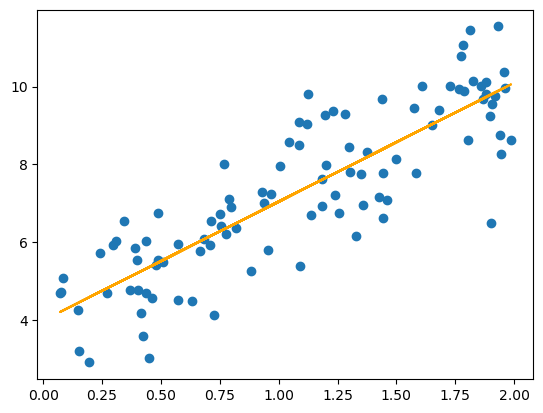

In [3]:
' Plot the raw data and the best fit predictions'
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_best), color='orange')

In [4]:
' Performing linear regression with sklearn is very simple'
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print('Bias: ', lin_reg.intercept_, 'Coefficient: ', lin_reg.coef_)

lin_reg.predict(X_new)

Bias:  [3.9880435] Coefficient:  [[3.05409522]]


array([[ 3.9880435 ],
       [10.09623394]])

<b> A caveat for inverted matrices is that they require a non-zero determinant.  This isn't always the case.  A work-around is the Moore-Penrose Inverse aka the pseudoinverse.  This utilizes Singular Value Decomposition to generate an equivalent matrix which is always invertible.  This method is also more computationally efficient. Sklearn ueses this method natively </b>

## Gradient Descent

<b> Gradient Descent outperforms sklearn and the Normal Equation when the dataset is extremely large (100,000+ features).  </b>

<b> General notes about gradient descent </b>
* Tweaks parameters iteratively in order to minimize a cost function
* Not all cost functions are convex.  As such, one hurdle for gradient descent is overcoming local minima and plateaus
* The learning rate is the primary parameter for correctly finding the absolute minima.  Too high and the optimizer will diverge and never find a minima. Too low and it will stop too soon at a local minima
* Because a convex function has exactly 1 minima they are ideal. If possible, transform the cost function such that its transformation is convex.
* Scaling all features has an enormous impact on how long it takes for the optimizer to find the mininma. 
* Gradient descent utilizes the properties of partial derivatives.  As such, a less complex derivative is arguably more important than a convex, continuous function.  Both is ideal.

## Gradient Vector of the Cost Function

#### <center>$\nabla_{\boldsymbol\theta}MSE(\boldsymbol\theta) = \frac{2}{m}\mathbf{X}^{T}(\mathbf{X}\boldsymbol\theta - \mathbf{y})$</center>

<br>

<b> Notice that this formula computes over the full training set X at each step.  The batch size here is 1 and as a result the training time on large datasets will be greatly impacted.  There are other ways to do this involving larger batch sizes which will be discussed later<b>

## Gradient Descent Step

#### <center>$\boldsymbol\theta^{\small{(next-step)}} = \boldsymbol\theta - \eta\nabla_{\boldsymbol\theta}MSE(\boldsymbol\theta)$</center>

In [5]:
' Validate the above expressions'
eta = 0.1  #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
print (theta, '\n', '\n', 'This is exactly what the Normal Equation yielded')


[[3.9880435 ]
 [3.05409522]] 
 
 This is exactly what the Normal Equation yielded


### Stochastic Gradient Descent

<b> Opposite to batch gradient descent which uses the entire training set at each epoch, stochastic gradient descent takes one random sample from the training set at each epoch and applies the gradient descent step.  This requires vastly less memory and as such is a better choice for very large training sets.  However, there are some nuances to the process.  Due to the randomness the descent curve will not be smooth and the optimal solution will never be settled upon.  This can help escape local minima but comes at the cost of a less perfect output.  One solution to converging on the optimal output using stochastic gradient descent is to implement a learning schedule in which the learning rate is gradually reduced such that the random jumps at the point of convergence are so small that the output is essentially the same as batch gradient descent. </b>

In [6]:
' An SGD example with a simple learning schedule'

# Epochs
n_epochs = 50

# Learning rate schedule
t0, t1 = 5, 50 

def learning_rate_schedule(t):
    return t0 / (t + t1)

# Random initialization
theta = np.random.randn(2, 1)

# SGD
for epoch in range(n_epochs):
    for i in range(m):  # m = 100 was declared in an earlier code block
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_rate_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[3.98833748],
       [3.10480855]])

<b> When using SGD it is best practice to shuffle the training set </b>

In [7]:
' Implementing SGD with Sklearn'
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # .ravel() is a numpy function which flattens an array into a single 1D array with all the input-array elements and with the same type as it

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.96403679] [3.06702716]


### Mini-batch Gradient Descent

<b> Mini-batch gradient desecent is essentially the middle ground between batch and sgd.  It computes gradients on small, random sets of instances called mini-batches. One advantage of SGD is you can get performance boosts from hardward optimzation when using matrix operations and GPUs.  It will likely end up closer to the minimum than SGD as well, although it may be harder to escape from local minima.  For large datasets this is usually the best algorithm. <b>

### Polynomial Regression

<b> Suprisingly, you can use linear regression algorithms to model non-linear relationships.  For example, consider a simple parabola.  You can simply augment the square of the feature(s) as additional features into the dataset and viola, you can use linear regression to estimate non-linear relationships <b>

In [8]:
' An example of estimating a polynomial function with linear regression'
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([0.55039883]), array([0.55039883, 0.30293888]))

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# Here we see an intercept close to 2, a second-degree coeffecient close to 0.5, and a first-degree coeffecient close to 1 as expected

(array([1.94692022]), array([[0.94920919, 0.5345575 ]]))

<b> Note that the PolynomialFeatures(degree=d) class will transform an array containing n-features into an array containing $\large\frac{(n + d)!}{d!n!}$ features.  Be cautious of the combinatorix nature of this augmentation <b>

### Learning Curves

<b> If, during cross-valdiation, a model performs well on training data but poor on valdation data it is likley overfitting.  If it performs poorly on both it is likely underfitting. This is one method to test for fitness.  Another is to analyze the learning curve.  Learning curves are plots of the model's performance on the training set and valdiation set as a function of the training set size (or the training iteration). <b>

In [10]:
' Observe an underfitting learning curve set'
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, X_train.shape[0]):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.axis([0, X_train.shape[0], 0, 3])
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend()

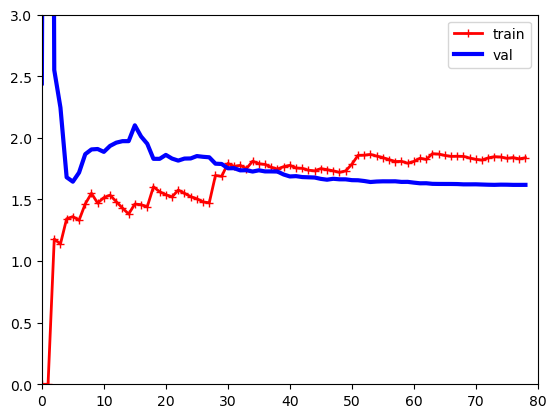

In [11]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

<b> These learning curves are typical of a model that is underfitting.  Both curves have reached a plateau; they are close and fairly high.  If a model is underfitting the training data, adding more training examples will not help.  You need to use a more complex model or come up with better features </b>

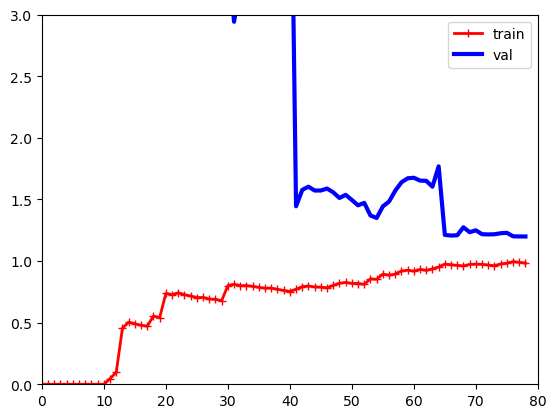

In [12]:
' Observe a model that is overfitting'
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

<b> The error here is lower than the underfit model and it performs much better on the training data.  This example doesn't show well but often you'll see a noticeable gap between the training and validation curve.  These are all characteristic of an overfit model.  One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error </b>

### The Bias/Variance Trade-off

<b> An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:</b>
    <br>
<b><i> Bias <i><b>:
    <br>
> A high-bias model is most likely to underfit the training data.  This is due to wrong assumptions, like fitting a straight line to a curve.
    
<b><i> Variance <b><i>:
> A model with many degrees of freedom is likely to have high variance and thus overfit the training data.  This is caused by extra sensitivity to small variations in the training data.
    <br>
    
<b><i> Irreducible error <b><i>:
> The only way to reduce this part of the error is to clean up the data.  Fix data sources, such as broken sensors, or detect and remove outliers. </b>

## Regularized Linear Models

<b> A good way to reduce overfitting is to regularize the model (i.e. to constrain it).  A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.  For a linear model, regularization is typically achieved by constraining the weights of the model.  Three common methods of regularization are <i> Ridge Regression, Lasso Regression, and Elastic Net <i><b>

### Ridge Regression

<b> Ridge regression, also known as Tikhonov regularization, is a regularized version of Linear Regression.  A regularization term equal to $\alpha\sum_{i=1}^{n} \theta{\scriptstyle i}^{2}$ is added to the cost function.  This forces the learning algorithm to keep the model weights as small as possible.  The regularization term should only be added to the cost function during training.  Once the model is trained use the unregularized performance measure to evaluate the model's performance. 
<br><br>
It is quite common for the cost function used during training to be different from the performance measure used for testing. A good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective.
<br><br>
If $\alpha = 0$ then the Ridge Regression is just Linear Regression.  If $\alpha$ is very large then all weights end up close to zero and the result is a flat line through the data's mean. The full form for the Ridge Regression cost function is:
<br><br><center>
$\large{J}(\boldsymbol\theta) = MSE(\boldsymbol\theta) + \alpha\sum_{i=1}^{n} \theta{\scriptstyle i}^{2}$
    <br><br></center>
Note that the bias term $\theta{\scriptscriptstyle 0}$ is not regularized.<b>

In [13]:
' Use Ridge Regression with scikit-learn using the closed-form formula.'
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

# Alternatively you can set the solver hyperparameter to 'sag' to run the Ridge model with gradient descent.

array([[4.87413]])

In [14]:
' Use Ridge Regression with scikit-learn using gradient descent.'
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

# The penalty hyperparameter sets the type of regularization term to use.  l2 corresponds to ridge regression.

array([4.84645319])

### Lasso Regression

<b> Least Absolute Shrinkage and Selection Operator Regression is another regularized version of Linear Regression.  It adds a regularization term to the cost function, but it uses the L1 norm instead of half the square of the L2 norm. The cost function is as follows:
<br><br><center>
$\large{J}(\boldsymbol\theta) = MSE(\boldsymbol\theta) + \alpha\sum_{i=1}^{n} |\theta{\scriptstyle i}|$
    <br><br></center>
An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features.  In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (few non-zero weights).  Compared to Ridge Regression there are two main differences with Lasso.  First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down which helps convergence.  Second, the optimal parameters get closer and closer to 0 when you increase $\alpha$, but they never get eliminated entirely.
<br><br>
The Lasso cost function is not differentiable at $\theta{\scriptstyle i}$ = 0 but gradient descent works fine if you piece-wise the cost function and set the cost function to 0 when $\theta{\scriptstyle i}$ = 0

In [15]:
' Example of Lasso regression'
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

# This is equivalent to setting the SGDRegressor(penality='l1')

array([4.8302968])

### Elastic Net

<b> Elastic Net is a middle ground between Ridge Regression and Lasso Regression.  The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio <i> r </i>.  When r = 0 Elastic Net is equivalent to Ridge Regression and when r = 1 it is equivalent to Lasso Regression.  The cost function is as follows:
<br><br><center>
$\large{J}(\boldsymbol\theta) = MSE(\boldsymbol\theta) + r\alpha\sum_{i=1}^{n} |\theta{\scriptstyle i}| + \frac{1 - r}{2}\alpha\sum_{i=1}^{n} \theta{\scriptstyle i}^{2}$
    <br><br></center>
When should you use which regularization technique?  It is almost always preferable to have at least a little bit of regularization.  Ridge is a good default but if you suspect only a few features are useful you should prefer Lasso or Elastic Net because they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [16]:
' Example of Elastic Net'
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  #l1_ratio corresponds to the mix ratio r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.83472587])

### Early Stopping

<b>An elegant and simple regularization technique is early stopping.  This applies to iterative models like Gradient Descent.  By observing the loss curves of both the training set and validation set and ending the training once the validation loss begins to increase you can simply optimize your model to avoid over-fitting.  For more sporadic loss curves you can run until the validation loss is certainly increasing then roll back the model parameters to the point where the validation error was at a minimum <b>

In [17]:
' Basic implementation of early stopping'
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol= -np.inf,
    warm_start=True, # When the fit() method is called it continues training where it left off vs. restarting from scratch
    penalty=None,
    learning_rate='constant',
    eta0=0.0005
)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [18]:
best_model.fit(X_train_poly_scaled, y_train.ravel())
best_model.coef_, best_model.intercept_

(array([ 0.0538005 ,  0.05149678,  0.04109817,  0.04599173,  0.03067931,
         0.04125981,  0.0231371 ,  0.03799358,  0.01743695,  0.03581548,
         0.01295821,  0.03435796,  0.00931785,  0.03336632,  0.00626869,
         0.03267675,  0.00364795,  0.03218609,  0.00134688,  0.03182949,
        -0.00070834,  0.03156585, -0.00256885,  0.03136876, -0.00427089,
         0.03122094, -0.00584074,  0.03111076, -0.00729802,  0.03103022,
        -0.00865765,  0.03097364, -0.00993132,  0.03093684, -0.01112836,
         0.03091668, -0.01225636,  0.03091071, -0.01332163,  0.03091697,
        -0.01432946,  0.03093388, -0.01528442,  0.03096011, -0.01619044,
         0.03099453, -0.01705098,  0.0310362 , -0.0178691 ,  0.03108427,
        -0.01864754,  0.03113801, -0.01938879,  0.03119677, -0.02009507,
         0.03125998, -0.02076846,  0.03132713, -0.02141083,  0.03139775,
        -0.02202394,  0.03147142, -0.02260938,  0.03154778, -0.02316868,
         0.03162647, -0.02370322,  0.0317072 , -0.0

## Logistic Regression

<b> Logistic Regression (Logit Regression) is commonly used to estimate the probabilty that an instance belongs to a particular class.  If the estimated probability is greater than 50% the model predicts that the instance belongs to that class, otherwise it predicts that it does not.  A binary classifier labels the positive class a 1 and the negative class a 0. <b>

### Estimating Probabilities

<b> Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features plus a bias term.  Instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.
    <br><br>
The logistic - noted $\large\sigma$() - is a sigmoid function that outputs a number bewteen 0 and 1.
    <br><br>
    <center>
$\large\hat{p} = \sigma(\textbf{x}^{T}\bf{\theta})$
    <br><br>
$\large\sigma(t) = \large\frac{1}{(1 + e^{-t})}$
    <br><br>
    </center>
A Logisitc Regression model predicts 1 if $\bf{x}^{T}\bf{\theta}$ is positive and 0 if it is negative.  The score t is often called the <i>logit</i>. The logic is the inverse of the logistic function. The logit is also called the <i>log-odds</i> since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

    

### Training and Cost Function

$$
  \large{c}(\theta) = \cases{         -log(\hat{p})       & $y = 1$ \cr
                         -log(1 - \hat{p})  & $y = 0$
               }
$$

<b>-log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance or if the model estimates a probability close to 1 for a negative instance.  This cost function over a whole training set can be written as a complicated single expression called the <i>log loss</i>.  Refer to page 144 if curious.  <u> This cost function is convex </u>.  Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm.

### Decision Boundaries

<b> The iris dataset is famous and a perfect example to showcase logistic regression

In [19]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [20]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(int) #1 if Iris virginica, 0 otherwise.

# Train the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

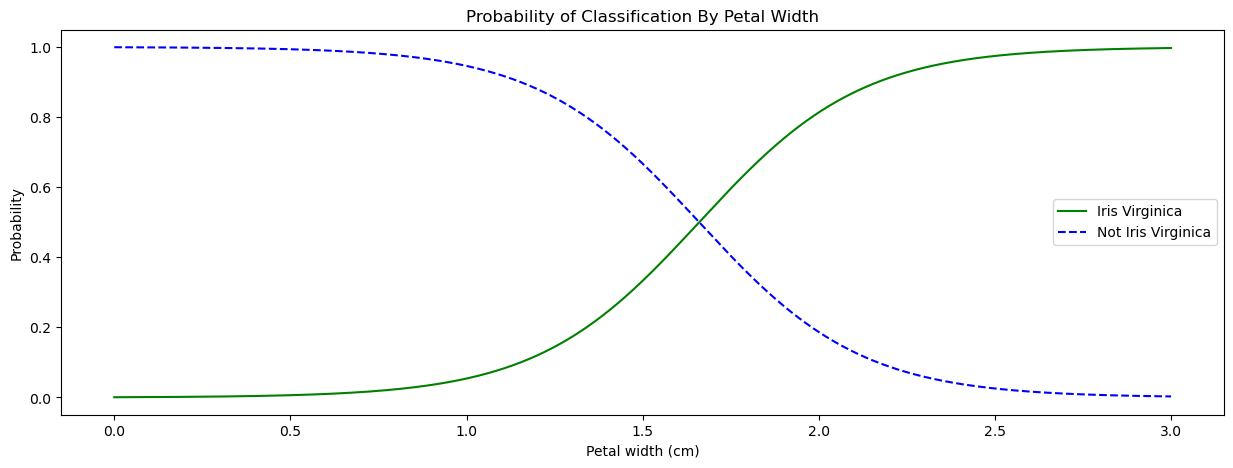

In [21]:
' Lets take a look at the models estimated probabilities for flowers with petal widths varying from 0 cm to 3 cm'
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(15, 5))
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend()
plt.title('Probability of Classification By Petal Width')
plt.show()

<b>Notice the decision boundary at around 1.6 (cm).  There is a threshold where the estimator will output the highest probability value as the classification.  The model is improved by adding in the petal lengths and sepal dimensions.

### Softmax Regression

<b> The Logistic Regression model can be generalized to support multiple classes directly.  This is called <i>Softmax Regression</i> or <i>Multinomial Logistic Regression</i>.  When given an instance x, the Softmax Regression model first computes a score $s_k(\bf{x})$ for each class k, then estimates the probability of each class by applying the softmax function to the scores.
    <br>
    <br>
    <center>
        $\large{s_k(\bf{x}) = \bf{x}^{T}\bf{\theta}^{(k)}}$
    </center>
    <br>
    <br>
Each class has its own dedicated parameter vector $\bf{\theta}^{(k)}$.  All these vectors are typically stored as rows in a parameter matrix.  Once you have computed the score of every class for the instance x, you can estimate the probability $\hat{p}_k$ that the instance belongs to class k by running the scores through the softmax function.  The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials).  The scores are generally called logits, or log-odds.
    <br>
    <br>
    <center>
        <i>Softmax Function</i>
        <br>
        $\large\hat{p}_k = \sigma(\bf{s}(\bf{x}))_k = \frac{\exp{(s_k(\bf{x}))}}{\sideset{}{_1^K}\sum\exp{(s_j(\bf{x}) )}}$
        <br>
        <br>
     </center>
    * K is the number of classes.
    <br>
    * $\bf{s({\bf{x})}}$ is a vector containing the scores of each class for the instance $\bf{x}$
    <br>
    * $\sigma(\bf{s}(\bf{x}))_k$ is the estimated probability that the instance $\bf{x}$ belongs to class k, given the scores of each class for that instance

    

<b> The prediction is then generated by taking the argmax of $\sigma(\bf{s}(\bf{x}))_k$ The argmax operator returns the value of a variable that maximizes a function.
    <br>
    <br>
The Softmax Regression classifer predicts only one class at a time (it is multi-CLASS, not multi-OUTPUT).  It should only be used with mutually exclusive classes, such as different types of plants.  It cannot be used to recognize multiple people in a single picture, for example.
    <br>
    <br>
    The most common loss function used with Softmax Regression is <i>cross entropy</i>

In [22]:
'Lets use Softmax Regression to classify the iris flowers into all three classes.'

# Scikit-Learn's Logistic Rregression uses one-versus-the-rest by default when you train on more than two classes.  But you can se the multi_class parameter to "multinomial" to switch to Softmax Regression
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

## Exercises

<b>1. Which Linear Regression training algorithm can you use if you have a training set with millions of features?

##### My Answer
Stochastic Gradient Descent (SGD) is a great Linear Regression option for very large datasets.  Mini-batch Gradient Descent works similarly well and is often the go-to for large datasets expected to hold a linear relationship

##### Provided answer
If you have a training set with millions of features you can use SGD or Min-batch Gradient Descent, and perhaps Batch Gardient Descent if the training set fits in memory.  But you cannot use the Normal Equation or the SVD approach because the computational complexity grows quickly (more than $O^2$) with the number of features


<b>2. Suppose the features in your training set have very different scales?  Which algorithms might suffer from this, and how?  What can you do about it?

#####  My answer
In general, scaling features is recommended for all models.  Unscaled training sets can take much longer to converge, assign disproportionate weights to features, and reduce overall predictive accuracy. Based on the datatype and business sense  of the problem always consider using Binary or One-Hot Encoding for categorical variables, and scaling methods like Standardization, Normalization, or Min-Max Scaling for numeric variables.  Pandas and SciKit-Learn offer built in classes/methods to do this within a Pipeline

#####  Provided answer
If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge.  To solve this you should scale the data before training the model.  Note that the Normal Equation or SVD approach will work just fine without scaling.  Moreover, regularized models may converge to a suboptimal solution if the features are not scaled: since regularization penalizes large weights, features with smaller values will tend to be ignored compared to features with larger values.



<b>3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

##### My answer

No.  The cost function for Logistic Regression is convex.  As such it will always converge at the global minima.

#####  Provided answer
Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex


<b>4. Do all Gradient Descent algorithms lead to the same model, provided you let them run long enough?

##### My answer

No. Not all Gradient Descent algorithms use the same cost function.  As such, local extrema are always a concern.  If hyperparameters are chosen in such a way as to avoid these local extrema then model convergence could vary slightly between different Gradient Descent algorithms.  Another point to make is that SGD and Mini-Batch Gradient Descent are natrually somewhat random in their step down the loss function.  If you let them run for exceptionally long times then they will converge at very similar results but unlikely exactly the same results.

##### Provided answer
If the optimzation problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum and end up producing fairly simliar models.  However, unless you gradually reduce the learning rate, Stochastic GD and Min-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum.  This means that even if you let them run for a very long time these Gradient Descent algorithms will product slightly differetn models.


<b>5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch.  If you notice that the validation error consistently goes up, what is likely going on?  How can you fix this?

##### My answer
In this case the model has likely started to overfit.  A common solution is to implement early stopping where the model training is completed upon the validation error increasing from the lows a certain number of times in a row.  It is also recommended to roll-back the model to the point where the validation error was at its lowest point.

#####  Provided answer

If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and the algorithm is diverging.  If the training error aslo goes up then this is clearly the problem and you should reduce the elarning rate.  However, if the training error is not going up, then your model is overfitting the training set and you should stop training.

<b>6. Is it a good idea to stop Min-batch Gradient Descent immeidately when the validation error goes up?

##### My answer'
No, do to the inherent randomness of the process it is best to allow validation some "wiggle room" before ending the training.  If early stopping is executed roll back the model parameters to when the validation loss was lowest

##### Provided answer

Due to their random nature, neither Stochastic Gradient Descent nor Mini-Batch GD is guaranteed to make progress at every single training iteration.  So if you immediately stop training when the validation error goes up, you may stop much too early, before the optimum is reached.  A better option is to save the model at regular intervals; then, when it has not improved for a long time (meaning it will probably never beat the record), you can revert to the best saved model.

<b>7. Which Gradient Descent algorithm (among the ones discussed in this chapter) will reach the vicinity of the optimal solution the fastest?  Which will actually converge? How can you make the others converge as well?  

##### My answer
SGD and Mini-Batch Gradient Descent will reach the vicinity of the optimal solution the fastest.  Utilizing the normal equation or Batch Gradient Descent will converge but will take longer.  You can get SGD or MBGD to converge by adjusting the learning rate on a schedule such that the incremental changes near the minima are small enough to land on the true minimum


##### Provided answer

Stochastic Gradient Descent has the fastest training iteration since it considers only one training instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Mini-batch GD with a very small mini-batch size).  However, only Batch GD will actually converge, given enough training time.  As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum unless you gradually reduce the learning rate.

<b>8. Suppose you are using Polynomial Regression.  You plot the learning curves and you notice that there is a large gap between the training error and the validation error.  What is happening? What are three ways to solve this?

##### My answer
The model is likely overfitting.  3 ways to solve this include:
1. Adding more data to the model.
1. Reducing the degrees of freedom
1. Introduce regularization


##### Provided answer

If the validation error is much higher than the training error, this is likely because your model is overfitting the training set.  One way to try to fix this is to reduce the polynomial degree; a model with fewer degrees of freedom is less likely to overfit.  Another thing you can try is to regularlize the model - for example, by adding an $l_2$ (Ridge) or an $l_1$ (Lasso) to the cost function.  This will also reduce the degrees of freedom of the model.  Lastly, you can try to increase the size of the training set.

<b>9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high.  Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter $\alpha$ or reduce it?

##### My answer
This model is likley underfitting and suffers from high bias.  In this case it is recommended to reduce $\alpha$


#####  Provided answer

If both the training error and the validation error are almost equal and fairly high, the model is likely underfitting the training set, which means it has a high bias.  You should try reducing the regularization hyperparameter $\alpha$

<b>10. Why would you use:
    <br>
> a. Ridge Regression instead of plain Linear Regression (i.e. without any regularization)?
    <br>
    > b. Lasso instead of Ridge Regression?
    <br>
    > c. Elastic Net instead of Lasso?

##### My answer
>a. If you have reason to believe the model may be overfitting then introducing a method of regularization can help.  Ridge Regression offers this in the form of $\alpha$.  Note that if $\alpha$ = 0 then you have a basic Linear Regression model. <br>
b. If you have reason to believe your model may be overfitting <u> and </u> there may be one or more redundant features in the training set then Lasso is preferred over Ridge as Lasso will automatically perform feature selection. <br>
c. If you are ever deciding between Elastic Net and Lasso then its almost always better to go with Elastic Net.  Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated whereas Elastic Net is more consistent even when these problems arise.


##### Provided answer

>a. A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression. <br>
b. Lasso Regression uses an $l_1$ penalty, which tends to push the weights down to exactly zero.  This leads to sparse models, where all weights are zero except for the most important weights.  This is a way to perform reature selection automatically, which is good if you suspect that only a few features actually matter.  When you are not sure, you should prefer Ridge Regression. <br>
c. Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances).  However, it does add an extra hyperparameter to tune.  If you want Lasso without the erratic behavior, you can just use Elastic Net with an l1_raio close to 1.

<b> 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime.  Should you implement two Logistic Regression classifiers or one Softmax Regression classifer?

##### My answer
You should implement two Logistic Regression classifiers as this is a binary class, multi-output problem.  Softmax Regression is used for multi-class, single output problems.

##### Provided answer

If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not exclusive classes (i.e., all 4 combinations are possible) you should training two Logistic Regression classifiers.

<b>12. Implement Batch Gradient Descent with early stopping for Softmax Regression without using Scikit-Learn

In [34]:
'''
My answer:  For the sake of time and practicality I will not finish this question.  I am comfortable in my abilty to program and I understand the calculus involved in gradient descent as well as 
the linear algebra involved in applying these gradient vectors to the entire dataset.  I do not believe in any future endevours that I will need to hard-code a softmax regression when the libraries
and tools found in the sklearn package are industry standard.  If that need does arise, I own this textbook and can reference its teachings.
'''

# Data
X = iris['data'][:, (2, 3)]
y = iris['target']

# Softmax
def sotfmax_scores(features: np.array):Matur
    
    return

def softmax_proba(scores: np.array):
    return

# Batch Gradient Desecent
def batch_gd():
    eta = 0.1
    iters = 1000
    m = 100
    theta = np.random.randn(2, 1)

    for iteration in range(iters):
        gradients = 1/m * 'sum from i to m of the softmax function p minus the actual target percent (1 or 0) dot x'
        theta = theta - eta * gradients


In [35]:
' Provided answer'



' Provided answer'